In [25]:
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [26]:
mypath='C:/Users/RAKSHITA/Documents/Resume screening/Resume/New Folder/'
#mypath='C:/Users/RAKSHITA/Documents/Resume screening/Resume'
#enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [27]:
import pandas as pd
keyword_dict = pd.read_csv('C:/Users/RAKSHITA/Documents/Resume screening/template_new2.csv', encoding='ISO-8859–1')
print(keyword_dict)

              Statistics     Machine Learning                  Deep Learning  \
0   Statistical modeling    linear regression                 neural network   
1            probability  logistic regression                          keras   
2    normal distribution              k means                         theano   
3   poisson distribution        random forest                 face detection   
4     hypothesis testing              xgboost                neural networks   
5     bayesian inference                  svm  convolutional neural networks   
6        factor analysis          nave bayes       recurrent neural network   
7            forecasting                  pca               object detection   
8           markov chain       decision trees                           yolo   
9            monte carlo                  svd                            gpu   
10            Statistics      ensemble models                           cuda   
11                   NaN    boltszman ma

In [28]:
def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        #print (t)
        text.append(t)
    return text

   Candidate Name Subject                       Keyword Count
0         aakriti     NLP  natural language processing      1
1         aakriti    Prog                       python      2
2         aakriti  Python                       python      2
3         aakriti     NLP                          lda      2
4         aakriti      DL               neural network      1
5         aakriti     MSc                         m.sc      1
6         aakriti     BSc                         b.sc      1
7         aakriti    Prog                         java      2
8         aakriti  Mobile                         java      2
9         aakriti      DL                deep learning      1
10        aakriti    Prog                            r      1
11        aakriti       R                            r      1
12        aakriti      DE                          sql      1
13        aakriti      ML             machine learning      1
   Candidate Name Subject                       Keyword Count
0       

   Candidate Name Subject                       Keyword Count
0         aakriti     NLP  natural language processing      1
1         aakriti    Prog                       python      2
2         aakriti  Python                       python      2
3         aakriti     NLP                          lda      2
4         aakriti      DL               neural network      1
5         aakriti     MSc                         m.sc      1
6         aakriti     BSc                         b.sc      1
7         aakriti    Prog                         java      2
8         aakriti  Mobile                         java      2
9         aakriti      DL                deep learning      1
10        aakriti    Prog                            r      1
11        aakriti       R                            r      1
12        aakriti      DE                          sql      1
13        aakriti      ML             machine learning      1
0         akshita     NaN                           NaN   NaN
0       

   Candidate Name Subject                       Keyword Count
0         aakriti     NLP  natural language processing      1
1         aakriti    Prog                       python      2
2         aakriti  Python                       python      2
3         aakriti     NLP                          lda      2
4         aakriti      DL               neural network      1
5         aakriti     MSc                         m.sc      1
6         aakriti     BSc                         b.sc      1
7         aakriti    Prog                         java      2
8         aakriti  Mobile                         java      2
9         aakriti      DL                deep learning      1
10        aakriti    Prog                            r      1
11        aakriti       R                            r      1
12        aakriti      DE                          sql      1
13        aakriti      ML             machine learning      1
0         akshita     NaN                           NaN   NaN
0       

   Candidate Name Subject                       Keyword Count
0         aakriti     NLP  natural language processing      1
1         aakriti    Prog                       python      2
2         aakriti  Python                       python      2
3         aakriti     NLP                          lda      2
4         aakriti      DL               neural network      1
..            ...     ...                           ...   ...
8           parul       R                            r      1
0          ramesh    Prog                            r      1
1          ramesh       R                            r      1
2          ramesh   Front                        react      1
3          ramesh     IDE                      jupyter      1

[71 rows x 4 columns]
   Candidate Name Subject                       Keyword Count
0         aakriti     NLP  natural language processing      1
1         aakriti    Prog                       python      2
2         aakriti  Python                      

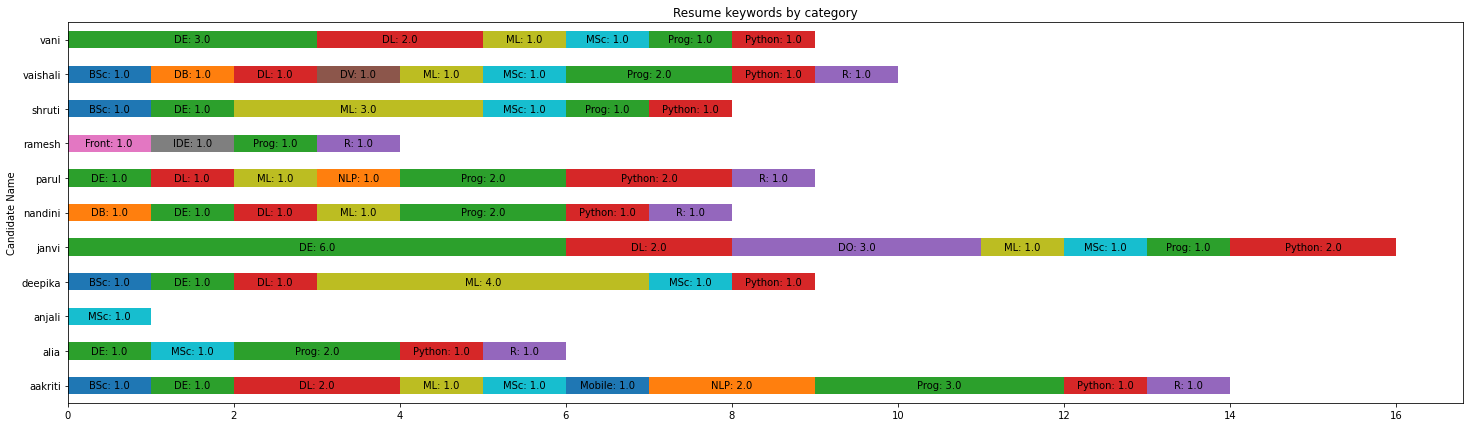

In [29]:
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('C:/Users/RAKSHITA/Documents/Resume screening/template_new2.csv', encoding='ISO-8859–1')
    keyword_dict=keyword_dict.apply(lambda x: x.astype(str).str.lower())
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python Language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
    Web_Development_words = [nlp(text) for text in keyword_dict['Web Development'].dropna(axis = 0)]
    Automation_Testing_words = [nlp(text) for text in keyword_dict['Automation Testing'].dropna(axis = 0)]
    Game_Development_words = [nlp(text) for text in keyword_dict['Game Development'].dropna(axis = 0)]
    Frontend_words = [nlp(text) for text in keyword_dict['Front End'].dropna(axis = 0)]
    Backend_words = [nlp(text) for text in keyword_dict['Back End'].dropna(axis = 0)]
    Database_words = [nlp(text) for text in keyword_dict['Database'].dropna(axis = 0)]
    DevOps_words = [nlp(text) for text in keyword_dict['DevOps'].dropna(axis = 0)]
    Mobile_App_words = [nlp(text) for text in keyword_dict['Mobile App'].dropna(axis = 0)]
    Programming_words = [nlp(text) for text in keyword_dict['Programming Language'].dropna(axis = 0)]
    Data_Visualization_words = [nlp(text) for text in keyword_dict['Data Visualization'].dropna(axis = 0)]
    IDE_words = [nlp(text) for text in keyword_dict['IDE'].dropna(axis = 0)]
    Deploy_words = [nlp(text) for text in keyword_dict['Deploy'].dropna(axis = 0)]
    Data_Analysis_words = [nlp(text) for text in keyword_dict['Data Analysis'].dropna(axis = 0)]
    bachelors_words = [nlp(text) for text in keyword_dict['Bachelors'].dropna(axis = 0)]
    masters_words = [nlp(text) for text in keyword_dict['Masters'].dropna(axis = 0)]


    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    matcher.add('WD', None, *Web_Development_words)
    matcher.add('AT', None, *Automation_Testing_words)
    matcher.add('GD', None, *Game_Development_words)
    matcher.add('Front', None, *Frontend_words)
    matcher.add('Back', None, *Backend_words)
    matcher.add('DB', None, *Database_words)
    matcher.add('DO', None, *DevOps_words)
    matcher.add('Mobile', None, *Mobile_App_words)
    matcher.add('Prog', None, *Programming_words)
    matcher.add('DV', None, *Data_Visualization_words)
    matcher.add('IDE', None, *IDE_words)
    matcher.add('Deploy', None, *Deploy_words)
    matcher.add('DA', None, *Data_Analysis_words)
    matcher.add('BSc', None, *bachelors_words)
    matcher.add('MSc', None, *masters_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends
        
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

    
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
#sample2=new_data.to_csv('sample.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()

In [30]:
final_database2

Subject,Candidate Name,BSc,DB,DE,DL,DO,DV,Front,IDE,ML,MSc,Mobile,NLP,Prog,Python,R
0,aakriti,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0
1,alia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
2,anjali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,deepika,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
4,janvi,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0
5,nandini,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
6,parul,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0
7,ramesh,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,shruti,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0
9,vaishali,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0


In [31]:
# skills, education for eligibility
print("Choose from the following skills:'Statistics','NLP','Machine Learning','Deep Learning','R Language','Python Language','Data Engineering'")
skills=[]
degree=[]
for i in range(10):
    s=input("Enter skills:/(Press q to exit/)")
    if s=='q' or s=='Q':
        break
    else:
        skills.append(s)
for i in range(10):
    d=input("enter the eligible degrees:/(Press q to exit/)")
    if d=='q' or d=='Q':
        break
    else:
        degree.append(d)

Choose from the following skills:'Statistics','NLP','Machine Learning','Deep Learning','R Language','Python Language','Data Engineering'
Enter skills:/(Press q to exit/)BSc
Enter skills:/(Press q to exit/)Q
enter the eligible degrees:/(Press q to exit/)DL
enter the eligible degrees:/(Press q to exit/)ML
enter the eligible degrees:/(Press q to exit/)Q


In [32]:
subjects=list(final_database2.columns)
subjects=subjects[1:]
subjects

['BSc',
 'DB',
 'DE',
 'DL',
 'DO',
 'DV',
 'Front',
 'IDE',
 'ML',
 'MSc',
 'Mobile',
 'NLP',
 'Prog',
 'Python',
 'R']

In [33]:
req=[]
req=skills+degree
print(req)

['BSc', 'DL', 'ML']


In [34]:
df=final_database2
df

Subject,Candidate Name,BSc,DB,DE,DL,DO,DV,Front,IDE,ML,MSc,Mobile,NLP,Prog,Python,R
0,aakriti,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0
1,alia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
2,anjali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,deepika,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
4,janvi,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0
5,nandini,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
6,parul,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0
7,ramesh,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,shruti,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0
9,vaishali,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0


In [61]:
def shortlist(req,df):
    for i in req:
            df[df[i] == 0.0]=None
    df=df.dropna()
    return df

In [62]:
df1=shortlist(req,df)
df1=df1.dropna()

In [64]:
df1

Subject,Candidate Name,BSc,DB,DE,DL,DO,DV,Front,IDE,ML,MSc,Mobile,NLP,Prog,Python,R
0,aakriti,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0
3,deepika,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0
9,vaishali,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0


In [ ]:
df2=df1['Candidate Name'].tolist()
print(df2)
